# TP AGENTS CONVERSATIONNELS : TP rasa (version 2.8)

### Tutoriel disponible en ligne

Accéder à la page suivante : https://rasa.com/docs/rasa/2.x/
A travers cette page, procéder aux différentes étapes de développement d'un chatbot. Ce notebook sert de compte rendu et devra être déposé à l'issue des séances. Travail individuel ou en binôme.

NOM ETUDIANT : SYLLA Mouhamad M.

# PARTIE 1 : ETUDE DU CHATBOT DE BASE

1- Partie Compréhension

INTENTS et ENTITIES (Intentions et Entités) - rasa V2
--------------------------------------------------------------

Observer le contenu du fichier "data/nlu.yml"   

version: "2.0"

nlu:
- intent: greet
  examples: |
    - hey
    - hello
    - hi
    - hello there
    - good morning
    - good evening
    - moin
    - hey there
    - let's go
    - hey dude
    - goodmorning
    - goodevening
    - good afternoon

- intent: goodbye
  examples: |
    - good afternoon
    - cu
    - good by
    - cee you later
    - good night
    - bye
    - goodbye
    - have a nice day
    - see you around
    - bye bye
    - see you later

- intent: affirm
  examples: |
    - yes
    - y
    - indeed
    - of course
    - that sounds good
    - correct

- intent: deny
  examples: |
    - no
    - n
    - never
    - I don't think so
    - don't like that
    - no way
    - not really

- intent: mood_great
  examples: |
    - perfect
    - great
    - amazing
    - feeling like a king
    - wonderful
    - I am feeling very good
    - I am great
    - I am amazing
    - I am going to save the world
    - super stoked
    - extremely good
    - so so perfect
    - so good
    - so perfect

- intent: mood_unhappy
  examples: |
    - my day was horrible
    - I am sad
    - I don't feel very well
    - I am disappointed
    - super sad
    - I'm so sad
    - sad
    - very sad
    - unhappy
    - not good
    - not very good
    - extremly sad
    - so saad
    - so sad

- intent: bot_challenge
  examples: |
    - are you a bot?
    - are you a human?
    - am I talking to a bot?
    - am I talking to a human?
-----------------------------------------------------

Comment interprétez-vous le contenu de ce fichier (= commentez en quelques lignes) ?
Ce fichier permet de recenser ce que peut dire un utilisateur a un assistant pour l'aider dans une tache.
Nous allons renseigner les intents et les différents exemples permettant de les reconnaitre.  
Combien d'intents et lesquelles ?
Il y en a 7; greet, goodbye, affirm, deny, mood_great, mood_unhappy, bot_challenge.
Combien d'entités et lesquelles ?
il n y a aucune entités ici.

2- Configuration

PIPELINE et POLICIES
-------------------------------------------------------------
Observer le contenu du fichier "config.yml" - Celles-ci peuvent ne pas être commentées suivant les versions - commentaire # pipeine par défaut  

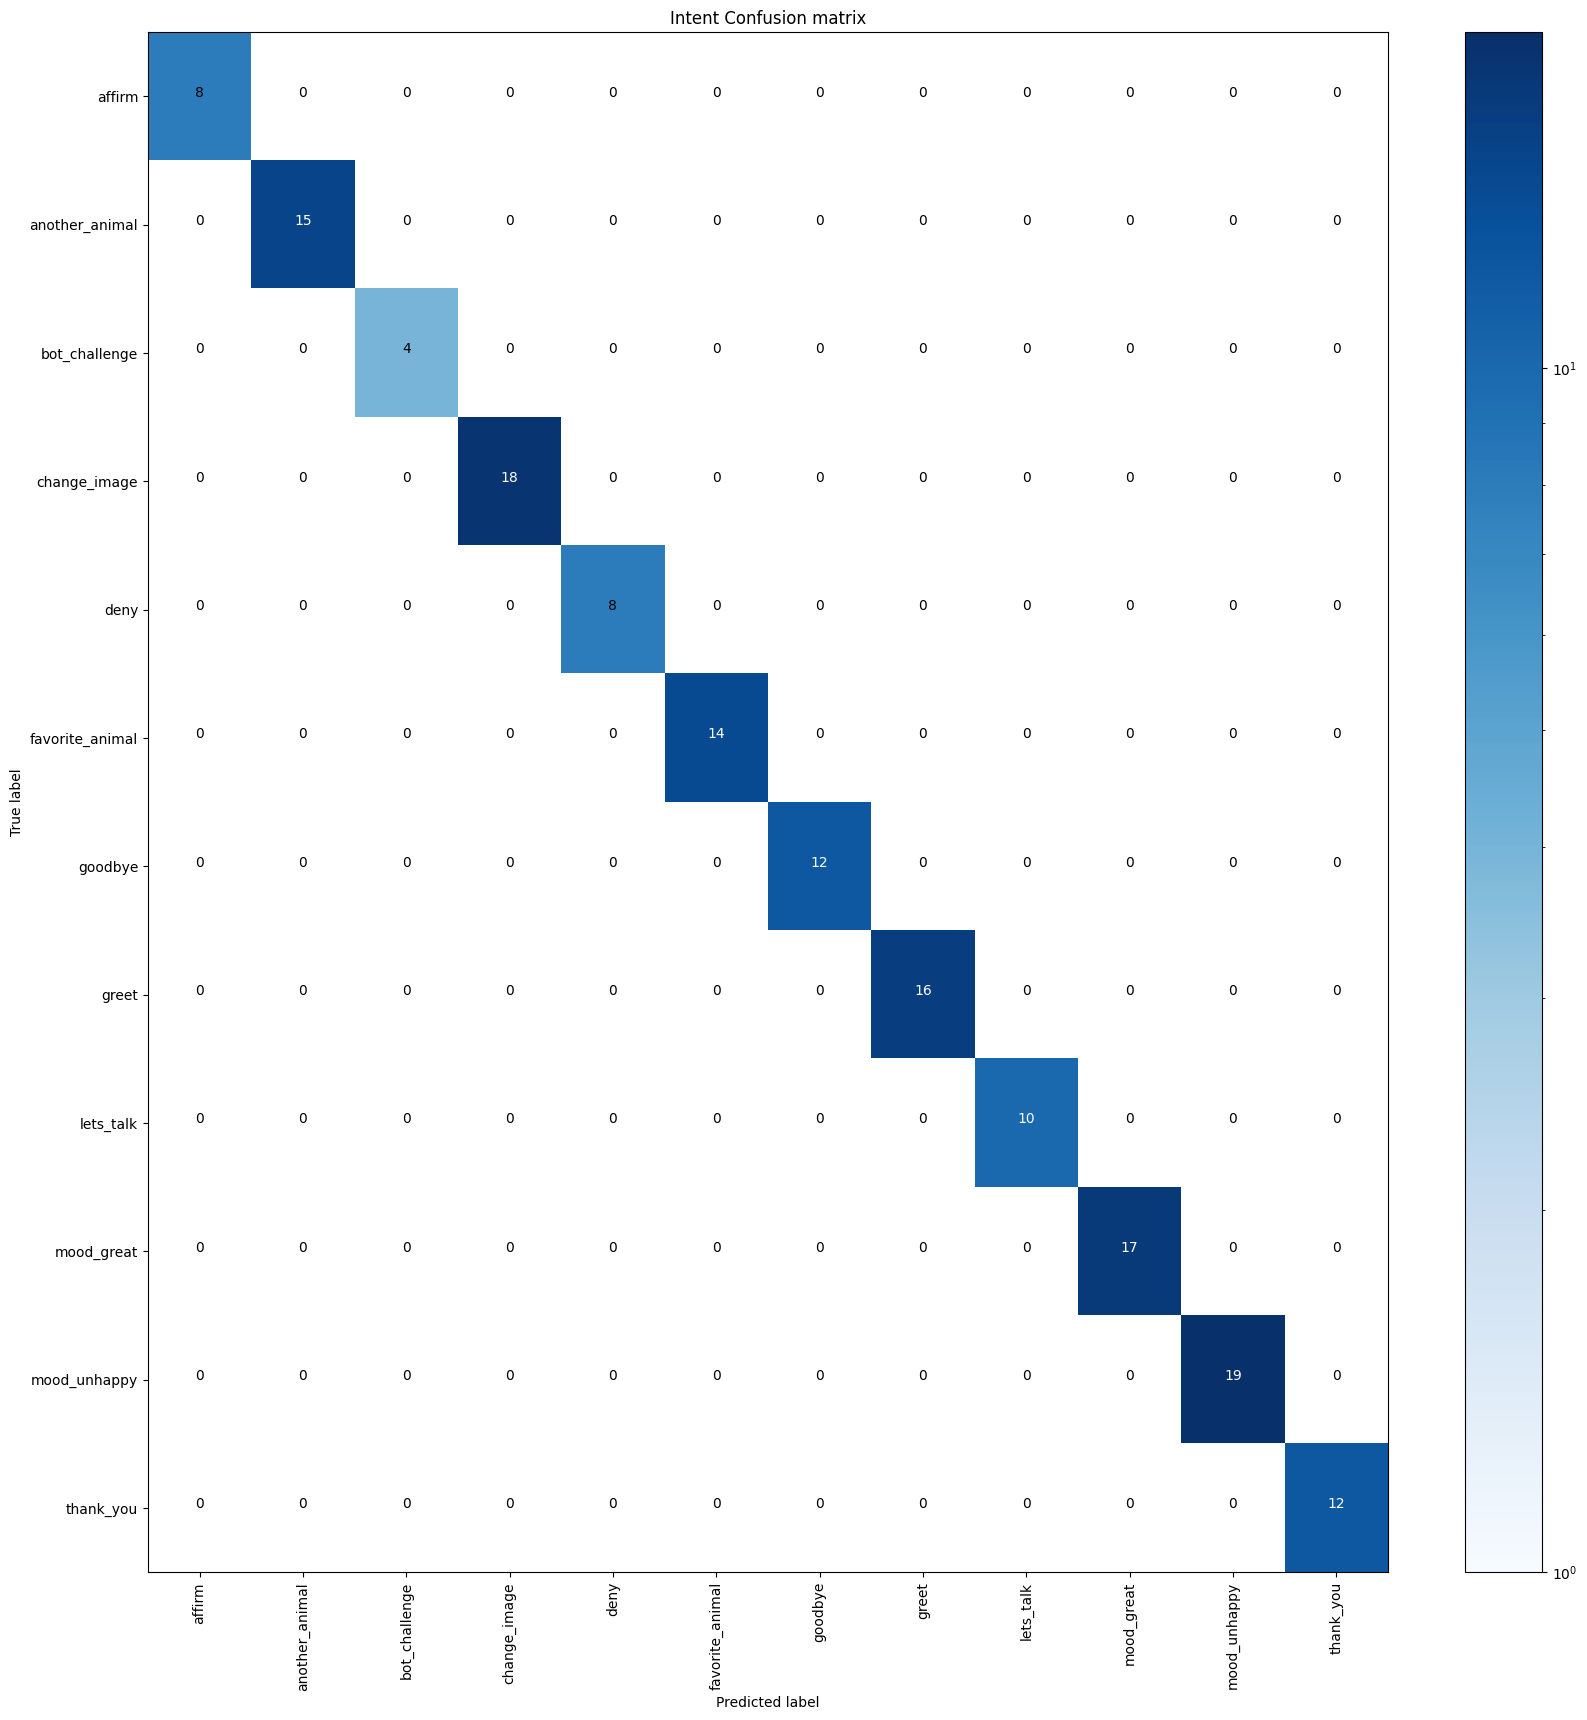
  
--------------------------------------------------------------

Comment interprétez-vous le contenu de ce fichier ? Chacune des 3 parties ?
- Ce fichier contient la configuration de la phase compréhension du langage par le chatbot;
- En plus de cela, nous avons le langage choisis par le chatbot; Ici, c'est de l'anglais.
- La pipeline utilisé pour le traitement de la partie NLU
- La policie (ou Stratégie). Elle permet de prédire la prochaine action & le niveau de confiance associé  




3- Gestion de dialogue

3.1- STORIES
-------------------------------------------------------------
Observer le contenu du fichier "data/stories.yml"

version: "2.0"

stories:

- story: happy path
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy

- story: sad path 1
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: affirm
  - action: utter_happy

- story: sad path 2
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: deny
  - action: utter_goodbye
  
-------------------------------------------------------------

Comment interprétez-vous le contenu de ce fichier ? Combien de stories ? Quel rôle ?
Les stories constitues les exemples de scénarios qui vont être appris par le chatbot et,
ce dernier se basera sur ça afin de répondre au mieux à l'utilisateur.
Nous avons un enchaînement d'interventions de l'utilisateur (intent) et du chatbot (action)
les actions (action) correspondent aux réponses possibles de l'assistant.
Il y a 3 stories ici,
- la première sert à converser (démarrer ou tenir une conversation avec un déroulement positif/négatif) de manière heureuse/happy (poisitif)
- La seconde et la 3eme sert propose des scénarios a issus négatif, c'est plutôt triste.

3.2- RULES
-------------------------------------------------------------
Observer le contenu du fichier "data/rules.yml"

version: "2.0"

rules:

- rule: Say goodbye anytime the user says goodbye
  steps:
  - intent: goodbye
  - action: utter_goodbye

- rule: Say 'I am a bot' anytime the user challenges
  steps:
  - intent: bot_challenge
  - action: utter_iamabot
-------------------------------------------------------------

Comment interprétez-vous le contenu de ce fichier ? Combien de règles ? Quel rôle ?
Ce fichier nous permet de défnir des régles de conversation.
Mais encore, c'est une modélisation des échanges "figés" , par exemple :
 - la première régle consiste à "dire goodbye lorsque l'utilisateur dis goodbye"
 - La seconde régle consiste à ce que le bot dise "I am bot" dés lors que l'utilisateur le challenge.

4- Domaine

Consultez le fichier décrivant l'environnement du chatbot
---------------------------------------------------------------------

Observer le contenu du fichier "domain.yml" peut être légèrement différent suivant les versions.

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true
  
intents:
- greet
- goodbye
- affirm
- deny
- mood_great
- mood_unhappy
- bot_challenge

responses:
  utter_greet:
  - text: Hey! How are you?
  utter_cheer_up:
  - image: https://i.imgur.com/nGF1K8f.jpg
    text: 'Here is something to cheer you up:'
  utter_did_that_help:
  - text: Did that help you?
  utter_happy:
  - text: Great, carry on!
  utter_goodbye:
  - text: Bye
  utter_iamabot:
  - text: I am a bot, powered by Rasa.


---------------------------------------------------------------------

Comment interprétez-vous le contenu de ce fichier ? Chacune des parties ?
Dans ce fichier, nous allons définir les réponses du chatbot et, nous allons déclarer les intents utilisés dans la partie NLU.

# PARTIE 2 : APPRENTISSAGE ET EVALUATION DU CHATBOT

RASA a été installé en local dans l'environnement virtuel env_rasa2.8 construit avec conda.

Il faut que c'est environnement ait été activé.
==> voir détal dans la section ENVIRONNEMENT en début de sujet.



5- Apprentissage

ATTENTION A BIEN ETRE DANS VOTRE REPERTOIRE CHATBOT_V1_VOTRE_NOM

5.1- Consultez le répertoire ./models de votre Chatbot
     si celui-ci contient un fichier <Nom_modele>.tar.gz supprimez ou renommez ce fichier

5.2- Depuis le répertoire CHATBOT_V1_VOTRE_NOM exécutez la commande : rasa train
-----------------------------------------------------------------------------------
Copier coller la trace de cette exécution

~/chatbot_SYLLA_V0$ rasa train
The configuration for policies and pipeline was chosen automatically. It was written into the config file at 'config.yml'.
Nothing changed. You can use the old model stored at '/home/storms/chatbot_SYLLA_V0/models/first_model.tar.gz'.

--------------------------------------------------------------------------------------------

Comment interprétez-vous cette trace ? Faites le lien avec le fichier config.yml et commentez ce que vous pensez avoir compris.
Selon moi, c'est parce qu'il n'y a aucune configuration mise en place pour le pipeline d'entrainement, ce qui va pousser le système
à automatiquement réutilisé celui deja présent dans le dossier models.

6- EVALUATION

6.1- Données de test

Observer le contenu du fichier ./tests/test_stories.yml
--------------------------------------------------------

#### This file contains tests to evaluate that your bot behaves as expected.
#### If you want to learn more, please see the docs: https://rasa.com/docs/rasa/testing-your-assistant

stories:
- story: happy path 1
  steps:
  - user: |
      hello there!
    intent: greet
  - action: utter_greet
  - user: |
      amazing
    intent: mood_great
  - action: utter_happy

- story: happy path 2
  steps:
  - user: |
      hello there!
    intent: greet
  - action: utter_greet
  - user: |
      amazing
    intent: mood_great
  - action: utter_happy
  - user: |
      bye-bye!
    intent: goodbye
  - action: utter_goodbye

- story: sad path 1
  steps:
  - user: |
      hello
    intent: greet
  - action: utter_greet
  - user: |
      not good
    intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - user: |
      yes
    intent: affirm
  - action: utter_happy

- story: sad path 2
  steps:
  - user: |
      hello
    intent: greet
  - action: utter_greet
  - user: |
      not good
    intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - user: |
      not really
    intent: deny
  - action: utter_goodbye

- story: sad path 3
  steps:
  - user: |
      hi
    intent: greet
  - action: utter_greet
  - user: |
      very terrible
    intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - user: |
      no
    intent: deny
  - action: utter_goodbye

- story: say goodbye
  steps:
  - user: |
      bye-bye!
    intent: goodbye
  - action: utter_goodbye

- story: bot challenge
  steps:
  - user: |
      are you a bot?
    intent: bot_challenge
  - action: utter_iamabot

--------------------------------------------------

Comment interprétez-vous le contenu de ce fichier ? Combien y-at-il de story de test ? Combien y-a-t'il de tour de parole utilisateur ? combien y-a-t'il d'actions ?

Ce fichier contient les scenarios de tests (7 test stories en total) pour differents stories afin d'evaluer le chatbot.
Nb_intents = 16
Nb_actions = 1 + 19 = 20


6.2- Résultas de l'évaluation

Depuis le répertoire CHATBOT_V1_VOTRE_NOM exécutez la commande :   
rasa test
-----------------------------------------------------------------------------
Copier coller la trace de cette exécution




-----------------------------------------------------------------------------

Comment interprétez vous cette trace ? Quels liens pouvez-vous faire avec le contenu du fichier de test ? Quelles sont les différentes étapes du test ?

Rasa a realise l'evaluation sur les 7 stories de test.
Accuracy: 1.000
Erreurs : 0

6.3- Analyse des résultats d'évaluation

Consultez le répertoire ./results

6.3.1- Evaluation des Intents - A
-------------------------------------------------
Ouvrir les fichiers intent_confusion_matrix.png et intent_histogram.png

A quoi correspond ces images ? Insérer les dans la cellule markdown ci-dessous si vous le pouvez.

Attention les images doivent être au même niveau que le notebook pour être affichées dans celui-ci.
Faire une copie de l'image au bon endroit si besoin.

In [13]:
! pwd
%cd './drive/MyDrive/chatbot_SYLLA_V0/'

/content
/content/drive/MyDrive/chatbot_SYLLA_V0


'/content/drive/MyDrive/chatbot_SYLLA_V0'

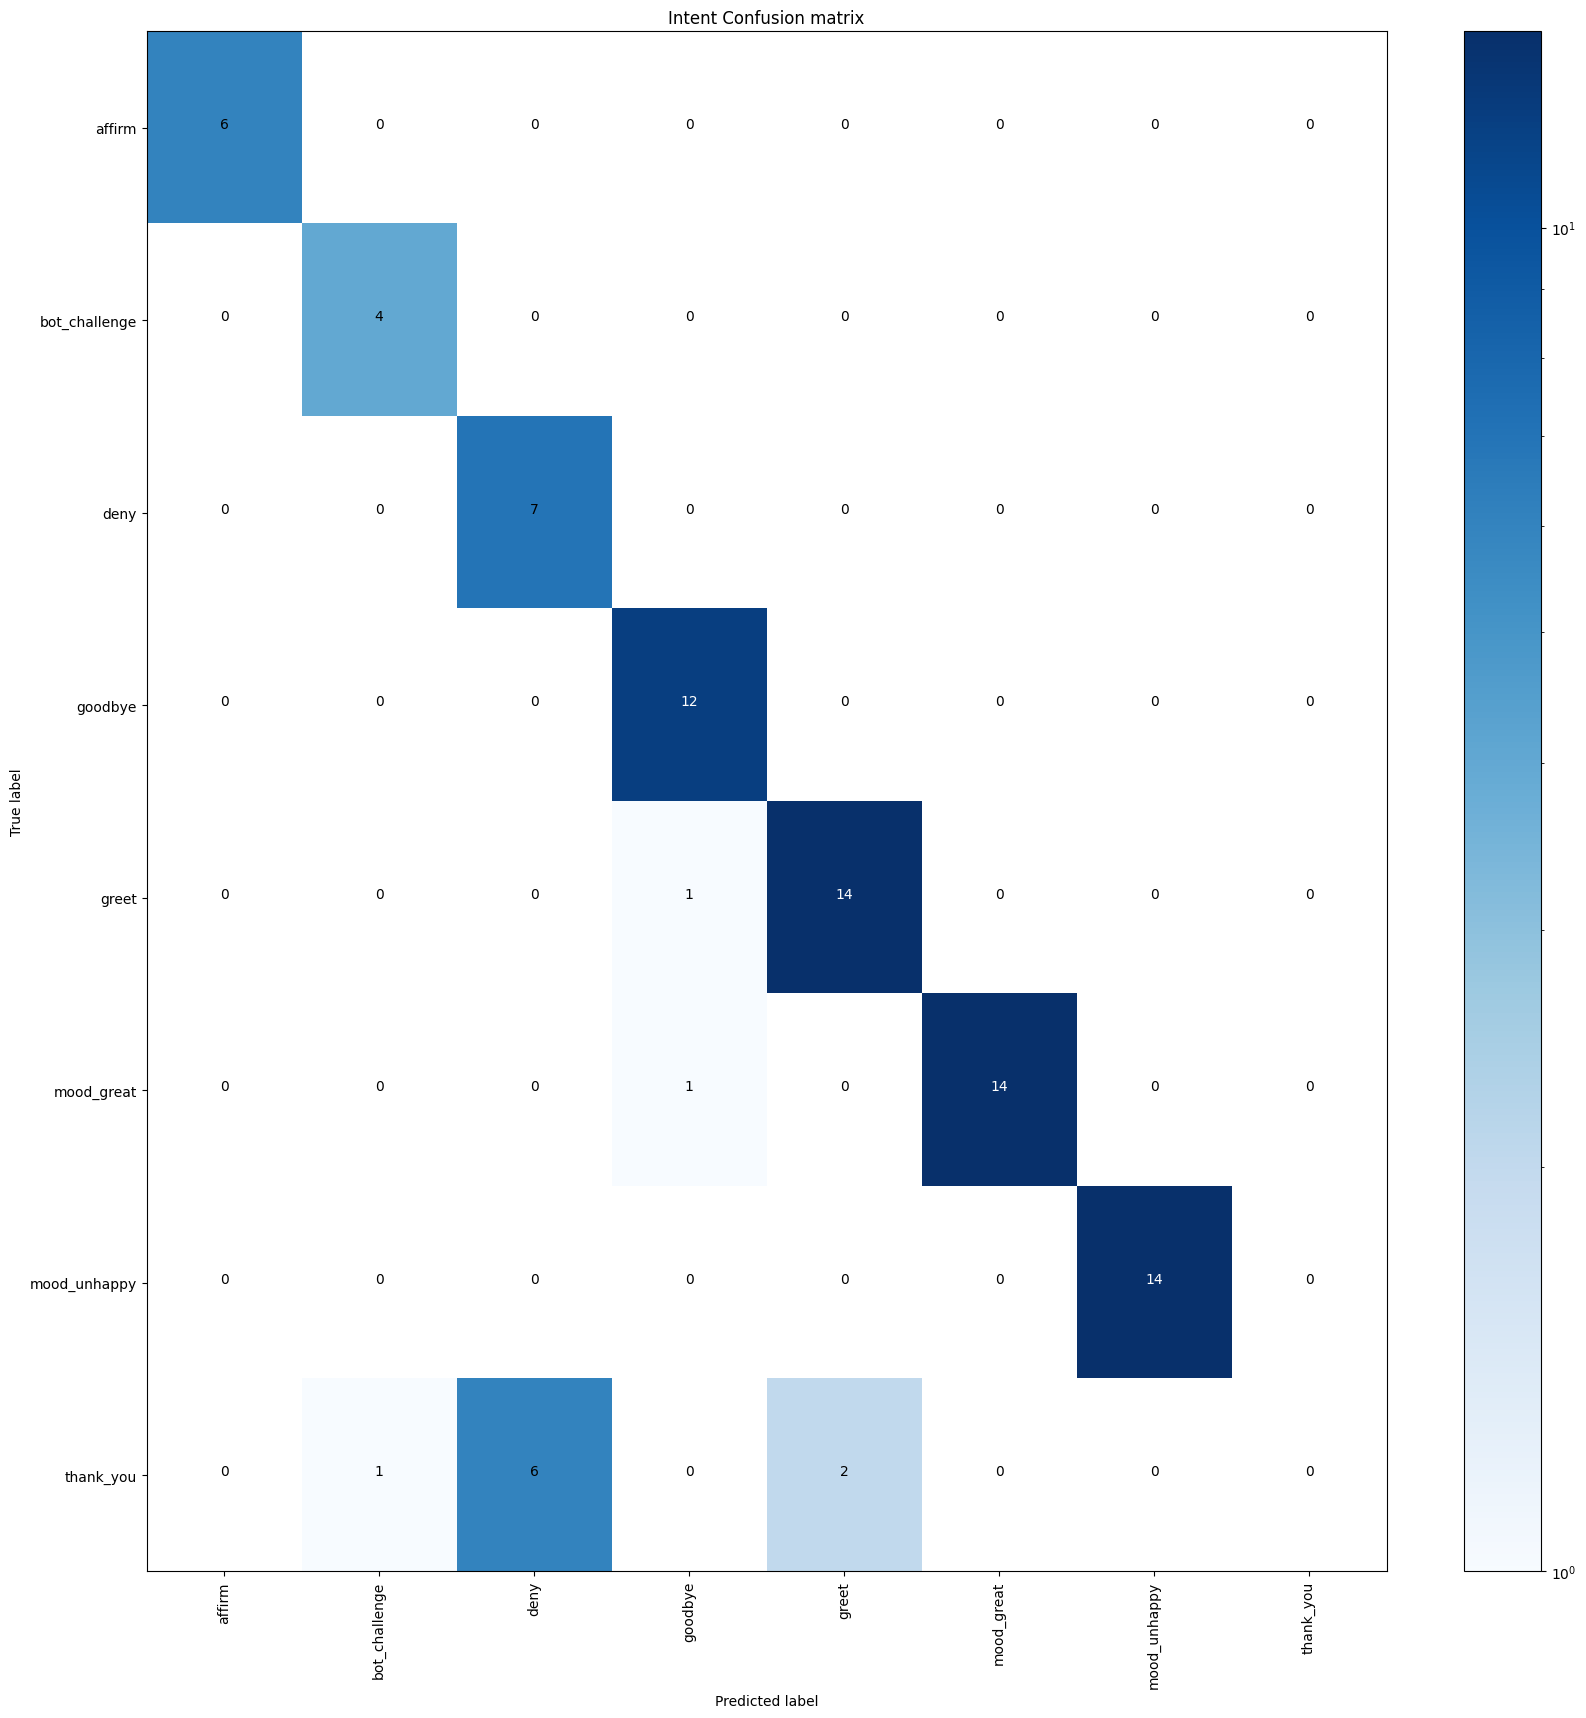

In [51]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/results_old/intent_confusion_matrix.png')
display(im)

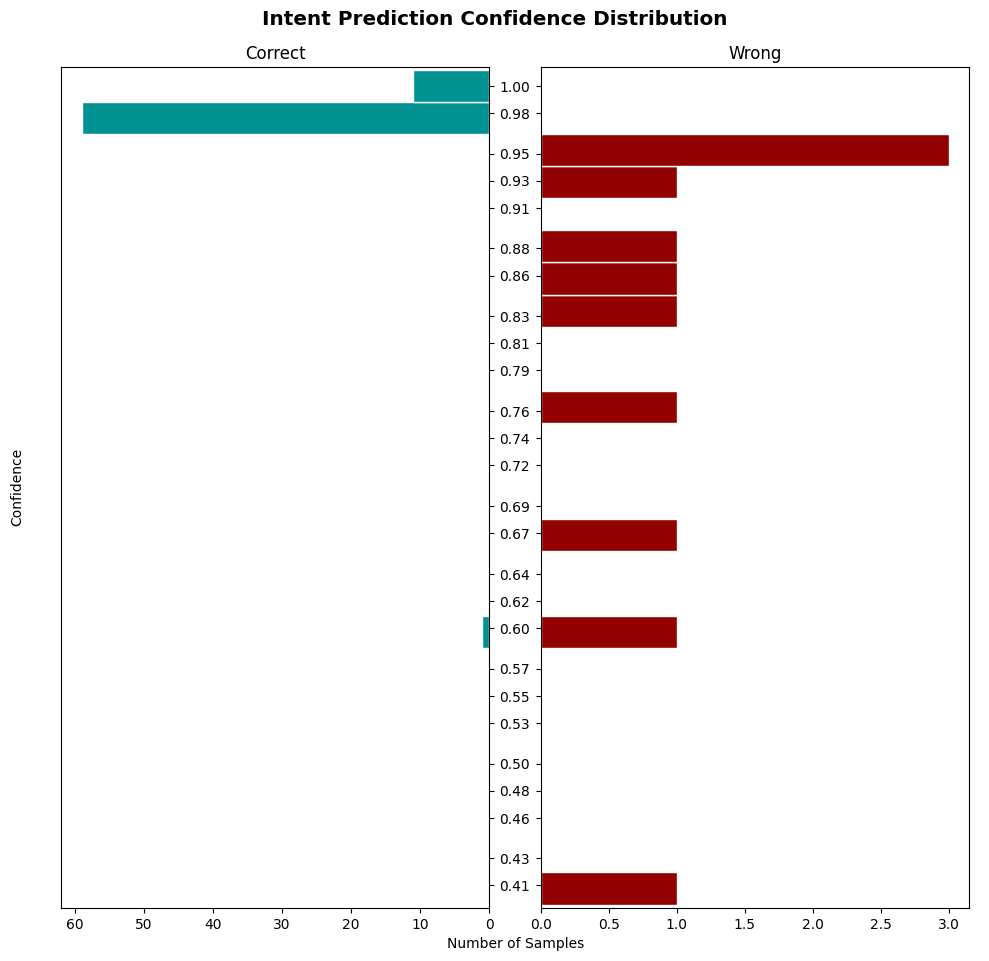

In [52]:
im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/results_old/intent_histogram.png')
display(im)

6.3.2- Evaluation des Intents - B
-------------------------------------------------
Etudier le contenu des fichiers intent_errors.json et intent_report.json
Remplacer par le contenu réel si différent du code ci-après.

### Contenu d'intent_errors.json :
"intent_errors" donne les intents pour lesquelles la prédiction est erronée.Nous avons le texte d'entrée, l'intent et la prediction d'intent ainsi que le taux de confiance en entrée.  

[
  {
    "text": "good afternoon",
    "intent": "greet",
    "intent_prediction": {
      "name": "goodbye",
      "confidence": 0.6189137101173401
    }
  }
]  

### Le contenue de intent_report.json

{
  - "bot_challenge": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4,
    "confused_with": {}
  },   
  - "affirm": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 6,
    "confused_with": {}
  },   
  - "goodbye": {
    "precision": 0.9166666666666666,
    "recall": 1.0,
    "f1-score": 0.9565217391304348,
    "support": 11,
    "confused_with": {}
  },   
  - "deny": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 7,
    "confused_with": {}
  },   
  - "mood_unhappy": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 14,
    "confused_with": {}
  },   
  - "mood_great": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 14,
    "confused_with": {}
  },   
  - "greet": {
    "precision": 1.0,
    "recall": 0.9230769230769231,
    "f1-score": 0.9600000000000001,
    "support": 13,
    "confused_with": {
      "goodbye": 1
    }
  },   
  - "accuracy": 0.9855072463768116,
  - "macro avg": {
    "precision": 0.988095238095238,
    "recall": 0.989010989010989,
    "f1-score": 0.9880745341614906,
    "support": 69
  },      
  - "weighted avg": {
    "precision": 0.9867149758454106,
    "recall": 0.9855072463768116,
    "f1-score": 0.9855324511657215,
    "support": 69
  }
}  


A quoi correspondent-il ? Quelle informations peut-on en déduire ?  

<u>Réponses</u> Pour les erreurs d'intent, il ya une confusion pour celle de good afternoon qui a été présdis comme un goodbyeavec une confiance de 61.9%

Vous pouvez consulter internet pour comprendre le rôle des métriques utilisées en complément du cours 4 EVALUATION, par exemple :

https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

<u>Réponses</u>

Concernant le rapport sur les intent, ce dernier donne les informations sur la précision de chaque intent.
De plus, il ya cinq métriques utilisées ici:

Precision : La précision est la capacité d'un modèle de machine learning à prédire correctement les exemples positifs parmi tous les exemples qu'il a prédits comme positifs.

Rappel (ou recall) : Le rappel est la capacité d'un modèle de machine learning à prédire correctement les exemples positifs parmi tous les exemples réellement positifs

F1-score : Le score F1 est une mesure qui combine à la fois le rappel et la précision. Il est utile car il fournit un équilibre entre la précision et le rappel. Le score F1 est calculé en prenant la moyenne pondérée de la précision et du rappel.

Support : Le support fait référence au nombre d'occurrences réelles de chaque classe dans l'ensemble de données. Il est utilisé pour calculer les moyennes pondérées de la précision, du rappel et du score F1.

7.3.3- Evaluation des stories -A
-------------------------------------------------
Copier-coller le contenu du fichier failed_test_stories.yml

- #### None of the test stories failed - all good!

-------------------------------------------------
Que concluez-vous ?
il y a eu aucune erreurs dans les stories.

6.3.3- Evaluation des stories -B
-------------------------------------------------
Etudier le contenu du fichier story_report.json

{
  "bot_challenge": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },  
  "affirm": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },  
  "goodbye": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },  
  "deny": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },  
  "utter_greet": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 5
  },  
  "action_listen": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 16
  },  
  "mood_unhappy": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },  
  "utter_goodbye": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4
  },  
  "utter_iamabot": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },  
  "utter_cheer_up": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },  
  "mood_great": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },  
  "utter_did_that_help": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },  
  "utter_happy": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },  
  "greet": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 5
  },  
  "accuracy": 1.0,  
  "macro avg": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 51
  },  
  "weighted avg": {  
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 51
  },  
  "conversation_accuracy": {  
    "accuracy": 1.0,
    "correct": 7,
    "with_warnings": 0,
    "total": 7
  }  
}
-------------------------------------------------
A quoi correspond-il ce fichier ?

Ce fichier apporte des informations sur la précision, le recall, le score f1, et support de chaque intentet action. De plus, il donne accuracy et weighted_avg.  

6.3.4- Evaluation des Intents - C
-------------------------------------------------
Ouvrir le fichier story_confusion_matrix.png

A quoi correspond cette image ? Insérer la dans la cellule markdown ci-dessous si vous le pouvez.

L'image ci-dessous correspond a la amtrice de confusion.
Cette matrice est crée à partir de test stories.

## Story confusion matrix



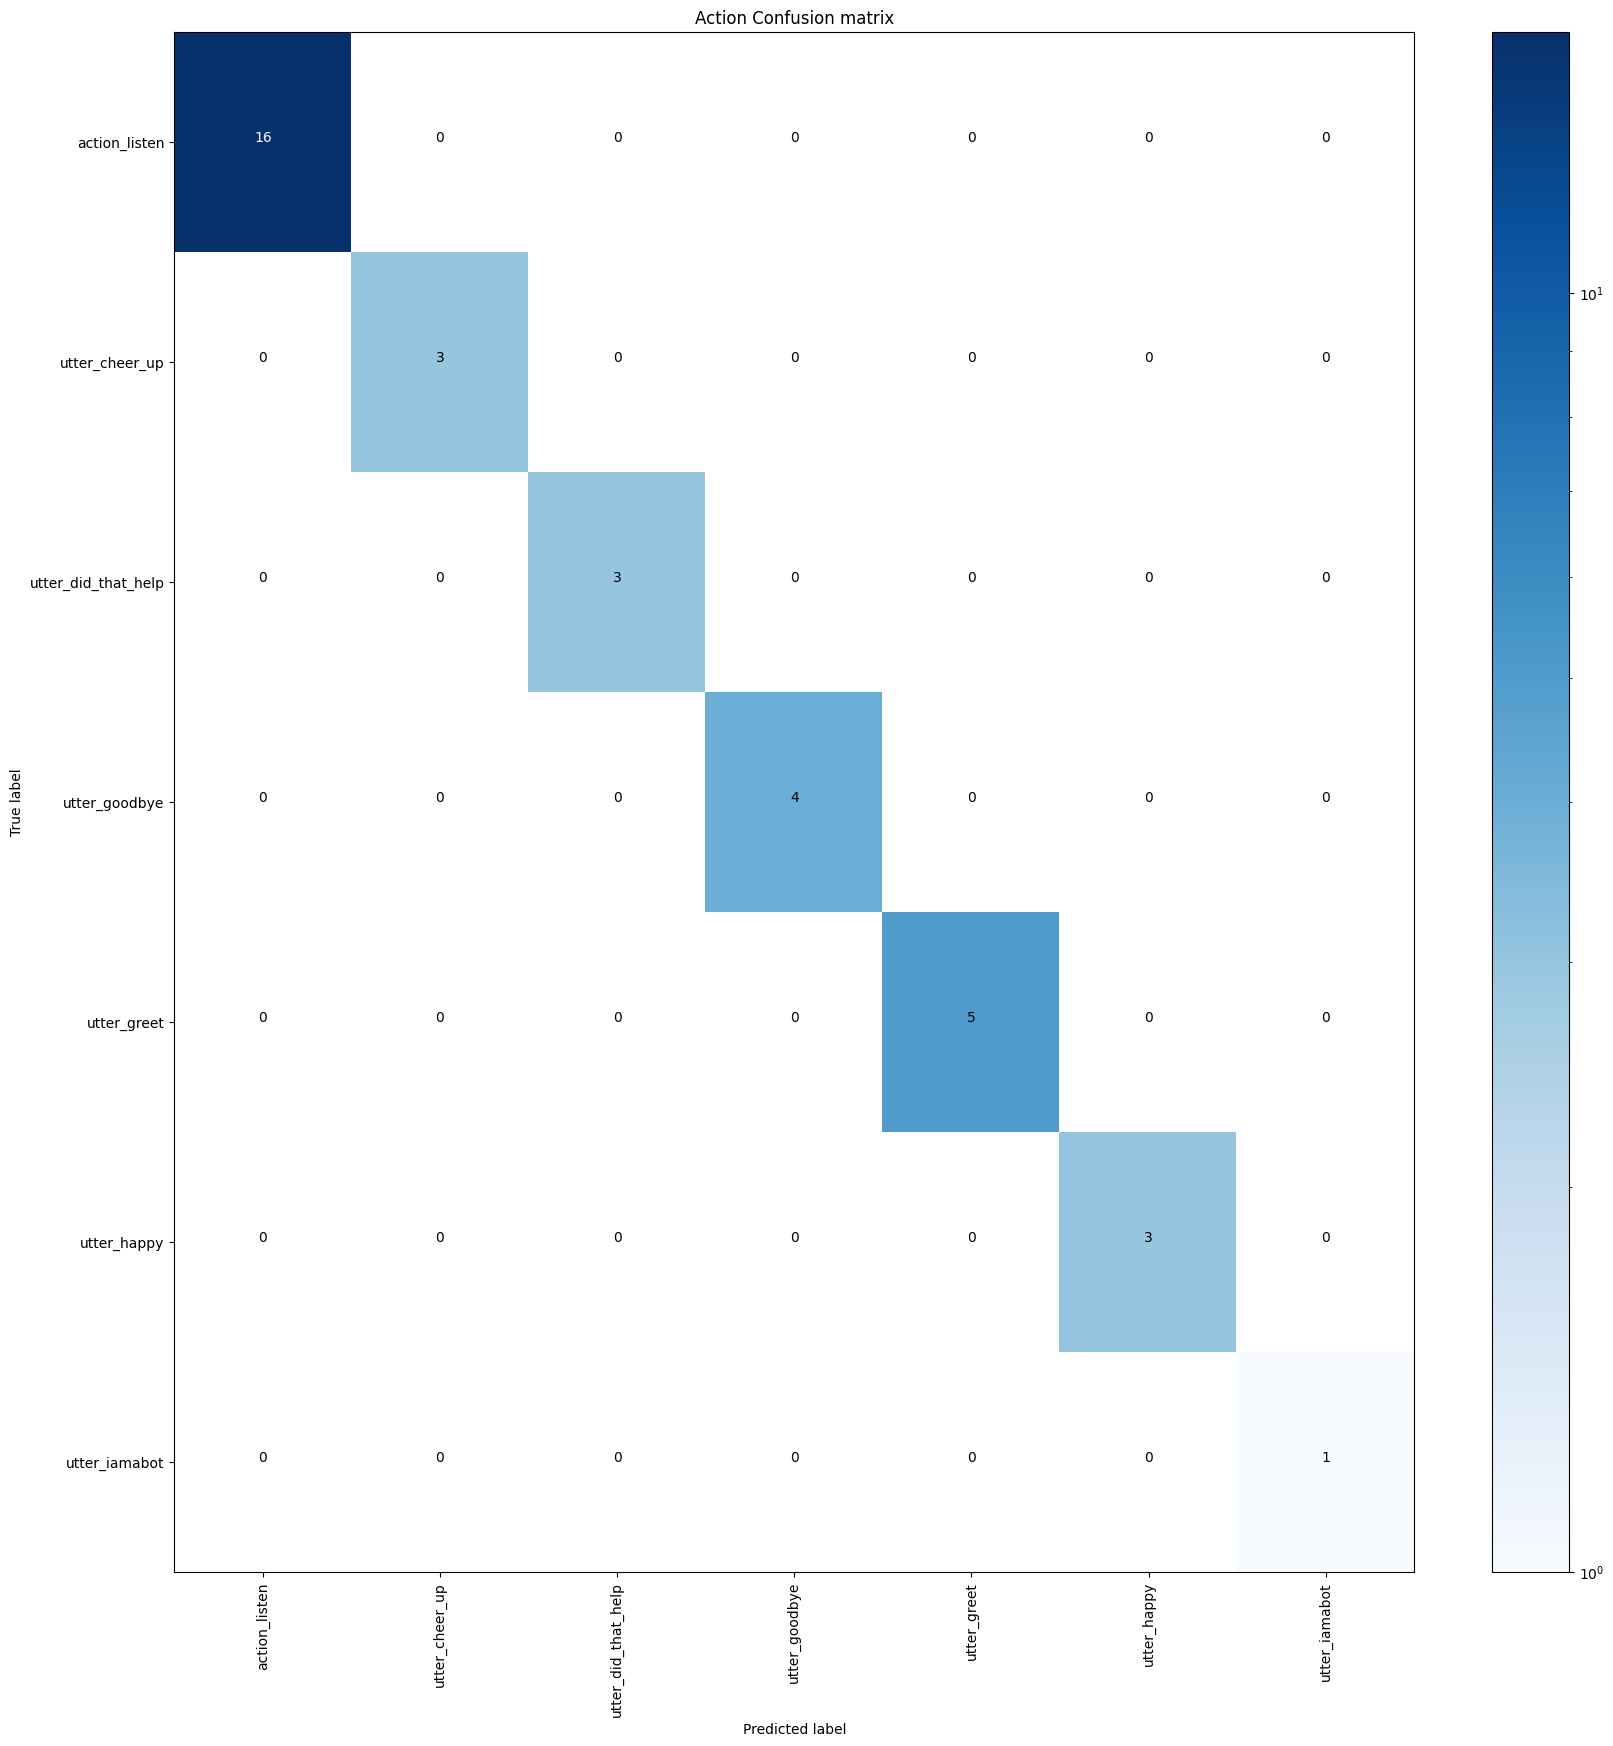

In [53]:
im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/results_old/story_confusion_matrix.png')
display(im)

# PARTIE 3 : DEVELOPPEMENT DU CHATBOT

7- Lancement du chatbot en mode commande

7.1- Depuis le répertoire où se trouve le code du chatbot, lancer la commande : rasa shell
-------------------------------------------------------------------------------------------

Vous avez le prompt suivant :
Bot loaded. Type a message and press enter (use ‘/stop’ to exit) :
Your input --> …

7.2- Essayer différents cas, copier-coller plusieurs exemples (pertinents) de dialogue
et commentez leur déroulement.

Ajoutez autant de cellule que d'exemples. Appuyez-vous sur ce que vous avez retenu des questions précédentes. L’objectif est de tester les capacités de ce mini-chatbot et de comprendre ce qui se passe.  

EXEMPLE DE DIALOGUE 1
COMMENTAIRE ASSOCIÉ: mood happy

Your input ->  hello                                                                                                                      
Hey! How are you?

Your input ->  Good                                                                                                                       
Great, carry on!

Your input ->  bye                                                                                                                        
Bye

EXEMPLE DE DIALOGUE 2
COMMENTAIRE ASSOCIÉ: mood sad

Your input ->  hi                                                                                                                         
Hey! How are you?

Your input ->  I am sad                                                                                                                   
Here is something to cheer you up:
Image: https://i.imgur.com/nGF1K8f.jpg
Did that help you?

Your input ->  yes                                                                                                                        
Great, carry on!

Your input ->  bye                                                                                                                        
Bye

8- Lancement du chatbot en mode interactif

8.1- Depuis le répertoire où se trouve le code du chatbot, lancer la commande : rasa x
-------------------------------------------------------------------------------------
Ouverture du navigateur et de l’application interactive permettant d’enrichir le chatbot.
Sélectionner l’onglet en haut à gauche : Talk to your bot (Interactive Learning), assurez-vous qu'un modèle a été sélectionné et tapez votre texte dans la zone du bas : "Start typing a message"

8.2- Essayer différents cas de dialogue (similaires à ceux de la question précédente),
copier-coller la partie story associée dans les zones de texte, une zone par story.
Ajouter des cellules au besoin.


Story 1 et Commentaire : mood happy
version: "2.0"
stories:
- story: Story from Conversation ID 2d6459e0614f458a867c4f188241851e
  steps:
  - intent: greet
  - action: utter_greet
  - intent: nlu_fallback
  - action: utter_happy
  - intent: deny
  - action: utter_goodbye
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy
  - intent: goodbye
  - action: utter_goodbye


Story 2 et Commentaire: mood sad
version: "2.0"
stories:
- story: Story from Conversation ID 1951acca91f14ccbb84cfaa765b68fc3
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: deny
  - action: utter_goodbye
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: affirm
  - action: utter_happy
  - intent: goodbye
  - action: utter_goodbye

# PARTIE 4 : EVOLUTION DU CHATBOT

9- Ajout de nouvelles INTENTS

9.1- Essayer à nouveau un dialogue :
- en répondant 'Good', 'Fine thanks', 'not well'
- en ajoutant, à la fin, des énoncés utilisateurs du type  'Thanks' / 'Thank you' / 'Many thanks'

Que se passe-t-il du point de vue "intent" ?

Copier-Coller ci-après les "story" correspondantes et commenter. Que suggérez-vous de faire pour améliorer ?

Story 1 et commentaire: mood happy
version: "2.0"
stories:
- story: Story from Conversation ID 3667d3005632468d86f536995f4bb0af
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy
  - intent: deny => "thanks"
  - action: utter_goodbye

Le thanks a été pris en compte comme une infirmation.

Story 2 et commentaire
version: "2.0"
stories:
- story: Story from Conversation ID 554618735c584042a424ff1d994f8cc6
  steps:
  - intent: greet
    user: |-
      hello
  - action: utter_greet
  - intent: deny
    user: |-
      fine thanks
  - action: utter_goodbye
  - intent: nlu_fallback
    user: |-
      good
  - action: utter_happy
  - intent: deny
    user: |-
      many thanks
  - action: utter_goodbye


9.2- Explorer les possibilités de rasa-x pour ajouter :

- une nouvelle intent 'thank_you',
- une réponse 'utter_welcome' et au moins deux réponses possibles :
    'you are welcome', 'you are very welcome'...
- une règle prévoyant ce type d’échange à la fin de la conversation :
    User : 'thank you' / 'thanks' / 'many thanks'
    Chatbot : 'you are welcome' / 'you are very welcome'
    
Copier-coller ici une story obtenue après nouveau dialogue intégrant les remerciements
et expliquer quelles seront selon vous les étapes d'améliorations suivantes.

Les étapes d'améliorations suivantes seront,  l'entrainement d'un nouveau modèle et la selection de celui ci, rajouter des user stories afin d'avoir beaucoup d'exemple et d'eviter des confusions. Mais aussi, il faudra utiliser la partie insight de rasa x.

9.3-Est-ce que ces nouvelles informations ont bien été intégrées dans le déroulement des dialogues exécutés par la suite ?   
  Non, les informations n'étaient pas pris en compte meme en les rajoutant dans domain, nlu, stories et test_stories.
- Quelles sont les 'intents' associées à l'énoncé 'Thank you' ?  
  L'intent 'deny.
- Commentez ci-dessous. Selon vous, comment peut-on améliorer la situation ?   
  En lançant la commande 'rasa train'.

Story obtenue après nouveau dialogue intégrant les remerciements

version: "2.0"
stories:
- story: Story from Conversation ID 93cf1619f12f466e929030eea00f3e9f
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy
  - intent: thank_you
  - action: utter_welcome

10- Apprentissage et génération d’un nouveau modèle

10.1- Explorer les fonctionnalités associées à la rubrique Training. Que constatez-vous ?
Commenter dans la zone texte suivante.

Via l'interface de rasa x, nous pouvons rajouter des intents; actions; exemples de stories et même changé la config si cela nous intéresse. Nous pouvons aussi procéder a l'apprentissage via la même rubrique (training).

10.2- Après avoir fait le nécessaire dans chaque rubrique (NLU Training, Responses, Stories, Configuration, Domain, ...) procéder à l’apprentissage via l'interface
Que se passe-t-il si vous allez voir dans la rubrique Models ?

IL y a la génération d'un nouveau modèle.

10.3- Sélectionner le bon modèle et recommencer les tests. Que constatez-vous ? Illustrer et commenter :
Exemples de stories et commentaires associés

11- Impact sur les données du chatbot

Examiner le fichier
- data/nlu.yml
- data/stories.yml
- data/rules.yml
- domain.yml
Que constatez vous dans chacun des cas ? Commentez.

- nlu.yml --> nouveau intent thank_you et une nouvelle action utter_welcome

- stories.yml --> pas de changements

- rules.yml --> nouvelle regle : action utter_welcome apres la detection de l'intent thank_you.

- doamin.yml --> nouvelle intent & nouvelle action.

# PARTIE 5 : COMPREHENSION ou NLU -
#### COMMENT CA MARCHE ?

- en_core_web_md
  - Langguage: EN english
  - Type: CORE Vocabulary, syntax, entities, vectors
  - Genre: WEB written text (blogs, news, comments)
  - size: MD 40 MB

Language anglais, taille 40 MB

- fr_core_news_md
  - Language: FR French
  - Type: CORE Vocabulary, syntax, entities, vectors
  - Genre: NEWS written text (news, media)
  - Size: MD 43 MB


Language francais , taille 43 MB

In [ ]:
%matplotlib inline
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

In [ ]:
# Positionnez-vous dans le bon répertoire à l'aide du code python suivant
import os

PATH = '/home/storms/chatbot_SYLLA_V0'
os.chdir(PATH)
os.listdir()

['credentials.yml',
 'domain.yml',
 'results_old',
 'TP_RASA_2023.ipynb',
 'actions',
 'events.db-shm',
 'config.yml',
 'TP_RASA.ipynb',
 'events.db',
 'tests',
 'models',
 'endpoints.yml',
 'results',
 'rasa.db',
 'data',
 '.ipynb_checkpoints',
 'events.db-wal']

15- Exécuter la séquence python suivante.
BIEN VERIFIER QUE VOUS AVEZ LANCE JUPYTER NOTEBOOK DEPUIS L'ENVIRONNEMENT VIRTUEL OU RASA EST INSTALLE (env_rasa2.8)

Les modèles chargés peuvent être utilisés pour traiter les énoncés des utilisateurs

In [ ]:
import rasa.nlu
import rasa.core
import spacy

print("rasa.nlu: {} rasa.core: {}".format(rasa.nlu.__version__, rasa.core.__version__))
print("Loading spaCy language model...")
#nlp = spacy.load('fr_core_news_md')
#print(spacy.load('fr')("Bonjour chez vous! Le modèle français est chargé"))  # si le lien existe
print(spacy.load('fr_core_news_md')("Bonjour chez vous! Le modèle français est chargé"))
#print(spacy.load('en')("Hello world! The English model has been loaded"))    # si le lien existe
print(spacy.load('en_core_web_md')("Hello world! The English model has ben loaded"))

rasa.nlu: 2.8.0 rasa.core: 2.8.0
Loading spaCy language model...
Bonjour chez vous! Le modèle français est chargé
Hello world! The English model has ben loaded


16- Exécuter la séquence python suivante.
BIEN VERIFIER QUE VOUS AVEZ LANCE JUPYTER NOTEBOOK DEPUIS L'ENVIRONNEMENT VIRTUEL OU RASA EST INSTALLE (env_rasa2.8)

La partie nlu peut être utilisée dans du code python pour développer ses propres applications.
Exécuter le code suivant. Il faut construire un interpréteur qui correspond à la partie pipeline

In [ ]:
import os
from rasa.shared.nlu.training_data.loading import load_data
from rasa.nlu.config import RasaNLUModelConfig
from rasa.nlu.model import Trainer
from rasa.nlu import config
from os import system

# Adapter le chemin à votre contexte
PATH = '/home/storms/chatbot_SYLLA_V0'
os.chdir(PATH)
os.listdir()
#Compléter avec le chemin vers votre environnement virtuel créé lors du 1er TP
print(os.getcwd())
print(os.listdir('data'))
warnings.filterwarnings('ignore')

# loading the nlu training samples
training_data = load_data("./data/nlu.yml")

# trainer to educate our pipeline
# décommenter le pipeline si besoin
trainer = Trainer(config.load("./config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

2023-12-25 16:50:47.983448: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-12-25 16:50:47.983489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/storms/chatbot_SYLLA_V0
['stories.yml', 'nlu.yml', 'rules.yml']


INFO:rasa.nlu.model:Starting to train component WhitespaceTokenizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component RegexFeaturizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component LexicalSyntacticFeaturizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component CountVectorsFeaturizer
INFO:rasa.nlu.featurizers.sparse_featurizer.count_vectors_featurizer:134 vocabulary items were created for text attribute.
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component CountVectorsFeaturizer
INFO:rasa.nlu.featurizers.sparse_featurizer.count_vectors_featurizer:1066 vocabulary items were created for text attribute.
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component DIETClassifier
2023-12-25 16:50:50.453077: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Coul

17- Commenter la trace obtenue et aller voir ce qu'il y a sous models/nlu/current en exécutant le code suivant

Sur la trace ci-dessus, nous avons la trace de l'entrainement du modèle. Cette entrainement a été fais en utilisant le pipeline de configuration.
IL ya des fichiers en lien avec le training... Par exemple, on a le fichier metadata.json, ce dernier contient des informations tel que le learning rate, le checkpoint, la loss, la version de rasa utilisée etc

In [ ]:
#PATH = '/Users/ferrane/Documents/ENSEIGNEMENT/SRI-3A/DOHM/BE_2020/TP_RASA_2020/CHATBOTS/CHATBOT_INIT_RASA2'
#os.chdir(PATH)
#os.listdir()
#Compléter avec le chemin vers votre environnement virtuel créé lors du 1er TP
print(os.getcwd())
print(os.listdir('models/nlu/current'))
warnings.filterwarnings('ignore')

/home/storms/chatbot_SYLLA_V0
['component_5_DIETClassifier.tf_model.data-00000-of-00001', 'component_6_EntitySynonymMapper.json', 'component_2_LexicalSyntacticFeaturizer.feature_to_idx_dict.pkl', 'component_5_DIETClassifier.sparse_feature_sizes.pkl', 'component_9_RegexEntityExtractor.json', 'component_3_CountVectorsFeaturizer.pkl', 'component_5_DIETClassifier.index_label_id_mapping.json', 'metadata.json', 'component_5_DIETClassifier.entity_tag_specs.json', 'component_5_DIETClassifier.label_data.pkl', 'component_5_DIETClassifier.data_example.pkl', 'checkpoint', 'component_4_CountVectorsFeaturizer.pkl', 'component_1_RegexFeaturizer.patterns.pkl', 'component_5_DIETClassifier.tf_model.index']


In [ ]:
pprint(interpreter.parse(""))

{
  "text": "",
  "intent": {
    "name": null,
    "confidence": 0.0
  },
  "entities": []
}


In [ ]:
pprint(interpreter.parse("I am fine thanks"))

{
  "text": "I am fine thanks",
  "intent": {
    "id": 1553000643623095190,
    "name": "mood_great",
    "confidence": 0.9994325041770935
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 1553000643623095190,
      "name": "mood_great",
      "confidence": 0.9994325041770935
    },
    {
      "id": -531581717259069655,
      "name": "thank_you",
      "confidence": 0.0001605599100003019
    },
    {
      "id": -2985079442767126976,
      "name": "bot_challenge",
      "confidence": 0.0001489432470407337
    },
    {
      "id": 6438996295688282193,
      "name": "favorite_animal",
      "confidence": 9.206578397424892e-05
    },
    {
      "id": 129096466463730324,
      "name": "change_image",
      "confidence": 3.751225449377671e-05
    },
    {
      "id": -4860934579111635115,
      "name": "mood_unhappy",
      "confidence": 3.603900768212043e-05
    },
    {
      "id": -2536337499661393657,
      "name": "lets_talk",
      "confidence": 3.201266736141406e-05
 

In [ ]:
pprint(interpreter.parse("Thank you"))

{
  "text": "Thank you",
  "intent": {
    "id": -531581717259069655,
    "name": "thank_you",
    "confidence": 0.9994283318519592
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": -531581717259069655,
      "name": "thank_you",
      "confidence": 0.9994283318519592
    },
    {
      "id": -2536337499661393657,
      "name": "lets_talk",
      "confidence": 0.0002211769751738757
    },
    {
      "id": -5496107830626611486,
      "name": "affirm",
      "confidence": 0.00011344657832523808
    },
    {
      "id": 1446713020567984556,
      "name": "ask_another_animal",
      "confidence": 0.00011260699102422222
    },
    {
      "id": -4860934579111635115,
      "name": "mood_unhappy",
      "confidence": 3.776328594540246e-05
    },
    {
      "id": 8906465107270864342,
      "name": "goodbye",
      "confidence": 3.378448309376836e-05
    },
    {
      "id": 2289675750729380361,
      "name": "greet",
      "confidence": 1.5085972336237319e-05
    },
    {
      

In [ ]:
pprint(interpreter.parse("I would prefer a puppy"))

{
  "text": "I would prefer a puppy",
  "intent": {
    "id": 129096466463730324,
    "name": "change_image",
    "confidence": 0.99933260679245
  },
  "entities": [
    {
      "entity": "animal",
      "start": 17,
      "end": 22,
      "confidence_entity": 0.9995723366737366,
      "value": "puppy",
      "extractor": "DIETClassifier"
    },
    {
      "entity": "animal",
      "start": 17,
      "end": 22,
      "value": "puppy",
      "extractor": "RegexEntityExtractor"
    }
  ],
  "intent_ranking": [
    {
      "id": 129096466463730324,
      "name": "change_image",
      "confidence": 0.99933260679245
    },
    {
      "id": 1446713020567984556,
      "name": "ask_another_animal",
      "confidence": 0.0003338597889523953
    },
    {
      "id": -2536337499661393657,
      "name": "lets_talk",
      "confidence": 0.00010149157606065273
    },
    {
      "id": 6438996295688282193,
      "name": "favorite_animal",
      "confidence": 6.662063969997689e-05
    },
    {
     

In [ ]:
pprint(interpreter.parse("I would have prefered a puppy"))

{
  "text": "I would have prefered a puppy",
  "intent": {
    "id": 129096466463730324,
    "name": "change_image",
    "confidence": 0.9963237047195435
  },
  "entities": [
    {
      "entity": "animal",
      "start": 24,
      "end": 29,
      "confidence_entity": 0.9995835423469543,
      "value": "puppy",
      "extractor": "DIETClassifier"
    },
    {
      "entity": "animal",
      "start": 24,
      "end": 29,
      "value": "puppy",
      "extractor": "RegexEntityExtractor"
    }
  ],
  "intent_ranking": [
    {
      "id": 129096466463730324,
      "name": "change_image",
      "confidence": 0.9963237047195435
    },
    {
      "id": -2536337499661393657,
      "name": "lets_talk",
      "confidence": 0.0019035935401916504
    },
    {
      "id": 1446713020567984556,
      "name": "ask_another_animal",
      "confidence": 0.0007887128740549088
    },
    {
      "id": 6438996295688282193,
      "name": "favorite_animal",
      "confidence": 0.000343367486493662
    },
  

In [ ]:
pprint(interpreter.parse("I would like to thank you very much for this"))

{
  "text": "I would like to thank you very much for this",
  "intent": {
    "id": -531581717259069655,
    "name": "thank_you",
    "confidence": 0.8282759189605713
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": -531581717259069655,
      "name": "thank_you",
      "confidence": 0.8282759189605713
    },
    {
      "id": -2536337499661393657,
      "name": "lets_talk",
      "confidence": 0.09375938028097153
    },
    {
      "id": 2289675750729380361,
      "name": "greet",
      "confidence": 0.021900596097111702
    },
    {
      "id": -4860934579111635115,
      "name": "mood_unhappy",
      "confidence": 0.01978433132171631
    },
    {
      "id": 8068942812859262169,
      "name": "deny",
      "confidence": 0.012495779432356358
    },
    {
      "id": 129096466463730324,
      "name": "change_image",
      "confidence": 0.008167168125510216
    },
    {
      "id": 7908864490397879577,
      "name": "another_animal",
      "confidence": 0.00492671271786093

Commentaires sur les résultats obtenus:

- 'I am fine thanks' est reconnue comme thank you a cause des exemples contenu dans nlu.yml
- 'Thank you' est reconnu avec le bon label, cependant les phrases plus longues
comme :

- I would prefer a puppy
- I would have prefered a puppy
-
Les deux phrases ci dessus, ne sont pas reconnus avec le bon intent car il faut ajouter un nouvel intent dans nlu.yml

- I would like to thank you very much for this : cette phrase a été reconnu avec le bon intent même si le score de confiance est bas.

**reponse_selector** est nul dans chacune de nos interpretations car nous n'attenonds pas de réponses, nous voulons juste interpréter le texte et vérifier si le système a bien classé le texte avec la bonne intent.

# PARTIE 6 : Evolution du chatbot (suite) et évaluation

19- Intégration de nouvelles intents et d'entités

19.1) Que faut-il faire pour prendre en compte de nouvelles intentions (intent) qui permettraient de traiter des phrases comme :

- I would like to see another animal
- Do you have other animals to show
- I want to see another picture

Avec une réponse du type : I don't have any  
Avec une réponse du type : Here is another one (avec affichage d'une autre image).

<u>Réponses</u> :  
Pour cela, nous devons créer une nouvelle action, régle et intent. Ainsi que l'ajout de test_stories.  
- Les nouvelles intents:  
    - ask_another_animal
    - change_image
    - favorite_animal
    - another_animal  
- Les nouvelles actions:
    - action_show_image
    - action_random_image
    - action_favorite_animal  
    
La définition d'une entity 'animal' ainsi qu'une lookup table (fichier nlu.yml) qui va définir les différents animaux que nous allons définir les animaux que nous souhaitons afficher avec l'action show_image.
- lookup: animal
  examples: |
    - puppy
    - butterflies
    - kangaroo
    - elephant
    - turtle
    - giraffe
    - girafe
    - panda
    - cat
    - horse

Les nouvelles régles:  

- rule: display the animal image that user asks for
  steps:
  - intent: change_image
  - action: action_show_image

- rule: display a random animal
  steps:
  - intent: another_animal
  - action: action_random_image

L'une nous permet d'afficher une image lorsque l'utilisateur le demande. L'autre régle nous permet de d'afficher un animal au hasard.  
Afin de pouvoir utiliser les synonymes de chaque animal, nous devons rajouter ces derniers dans le fichier nl.yml.  

- synonym: horse
 examples: |
     - horses
     - pony
     - ponnies
- synonym: puppy
 examples: |
     - dog
     - man's best friend
     - pup
     - doggy
- synonym: cat
 examples: |
     - kitty
     - kittis
     - kitten
     - meow
     - kitten  
     
------------------------------------------------------------------
# domain.yml
------------------------------------------------------------------
### Il faut definir l'intent, ajouter un utter_favorite_animal et créer l'action associé pour les affichage  
intents:
- favorite_animal
- lets_talk  

responses:  
 utter_favorite_animal:
 - text: what is your favorite animal?  

actions:
- action_favorite_animal


Faites le nécessaire au niveau du chatbot pour prendre en compte ces modifications et pour faire fonctionner le chatbot comme prévu.

19.2 Que faut-il faire pour prendre en compte de nouvelles intentions (intent) qui permettraient de traiter des phrases comme :

- I would like to see a puppy
- Do you have any pictures of butterflies
- I want to see a koala

Avec une réponse du type : Let me see ... I found this

en affichant une image prise sur internet ou disponible en local.

19.3 Créer une nouvelle version V2 (pour éviter d'écraser ce qui marche) et intégrer les modifications évoquées dans la questions précédente.

-------------

NB: Je n'ai pas créer de second répertoire avec ma V1... car jai commencé a travaillé sur les question 19.2 avant de regarder la question suivante ! Néanmoins, tous les résultats de la V1 sont contenues dans le dossier results_old.

19.4 Illustrer en donnant des exemples de dialogue incluant ce type d'échanges

- User : I would like to see a puppy
- Chatbot : Let me see ... I found this ... Does it help ?

Exemple 1 : 'i would like to see a puppy'
- User: hello
- Chatbot: Hey! how are you?
- User: great
- Chatbot: Great, carry on!
- User: i would like to see a puppy
- Chatbot: Let me see... I found this... Does it help?
- User: yes
- Chatbot: Great, carry on!
- User: bye
- Chatbot: Bye  


Exemple 2:  'Do you have any pictures of butterflies'  
NB: N'ayant pas de papillons dans ma base de donnée animal, je vais remplacer le mot butterflies par koala.  

- User: hello
- Chatbot: Hey! how are you?
- User: sad
- Chatbot: Here is something to cheer you up:
- Chatbot: Does it help?
- User: Do you have any pictures of koala
- Chatbot: Let me see... I found this... Does it help?
- User: yes
- Chatbot: Great, carry on!
- User: bye
- Chatbot: Bye

19.5) Faire évoluer votre chatbot sur les mêmes principes. Commenter et illustrer ces ajouts (Demander quel est votre animal préféré, ajouter une table lookup pour gérer les synonymes ... ou ajouter d'autres règles

(cf réponses précédentes)

## Evolution de votre chatbot et Commentaires associés

20 - A partir de rasa x et l'onglet stories, observer les modèles de dialogue associés aux différentes stories.

Faire une capture écran de l'un des graphes les plus représentatifs et insérer le dans la cellue suivante

<u>Model story graph - change image</u>


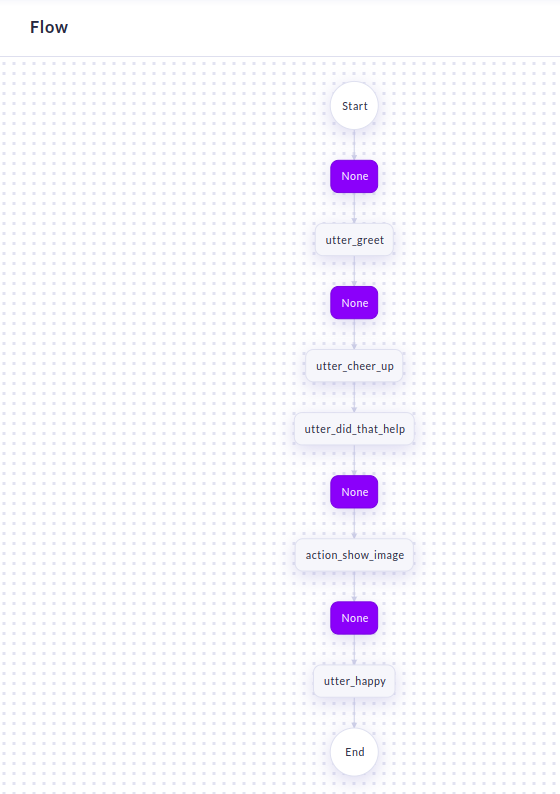

In [47]:
im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/flow_stories.png')
display(im)

<u>Model story graph - favorite animal</u>

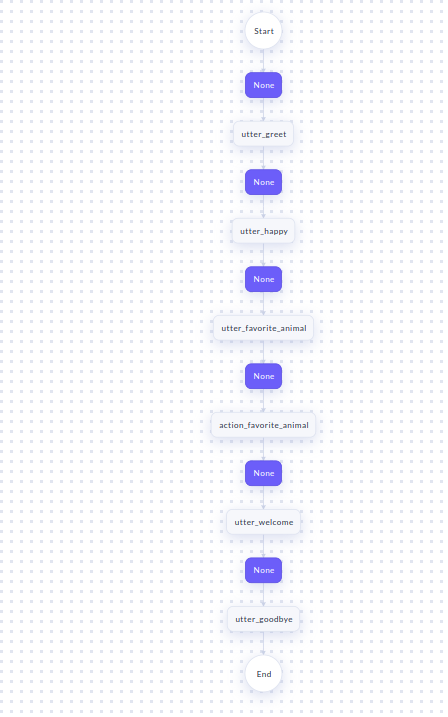

In [46]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/fav_animal.png')
display(im)

21- Visualisation Quitter rasa x en fermant la fenêtre du navigateur ET en tapant ^C dans le terminal de lancement.

Une fois rasa x attrêté, tapez la commande : rasa visualize
    
- Visualisez le fichier Graph.html
- Insérer dans la cellule suivante une copie image de ce graphe (copie écran ou autre)

Que représente-t-il ?

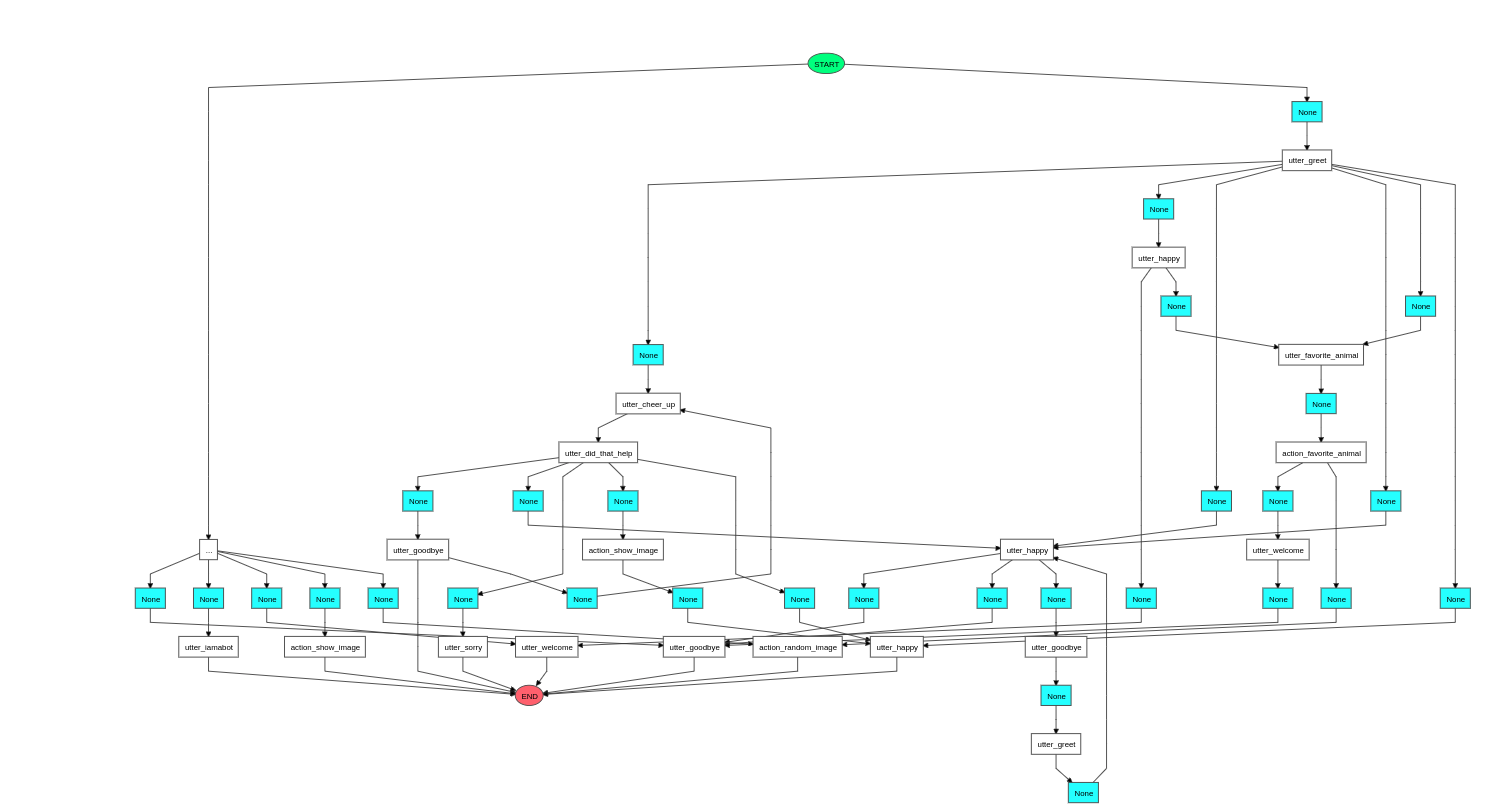

In [45]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/chatbot_SYLLA_V0/graph_html.png')
display(im)

Cette image nous donne une représentation visuelle du comportement de toute les stories données. Comme on peut le voir, on part de l'état start et on finis a end, entre ces deux états on a différentes possibilités... par exemple :
- utter_greet
- utter_cheer_up
- utter_did_that_help (réalisation de l'action show image)
- utter_sorry ou utter_happy
- utter_goodby

Ci-dessus, c'est un exemple de succession des différents états, et ce chemin se retrouve a travers le graphe.

22- Evaluation de la nouvelle version
--------------------------------------

Constituer un fichier de test adapté à ce nouveau chatbot et reprendre les questions de la partie 2 - Q7  pour visualiser et commenter les résultats obtenus.

Résultat de la commande : <b>rasa test</b>  

 - rasa test   
2023-12-27 02:31:50 INFO     rasa.model  - Loading model models/20231227-022853.tar.gz...   
2023-12-27 02:32:13 WARNING  rasa.shared.utils.common  - The UnexpecTED Intent Policy is currently experimental and might change or be removed in the future 🔬 Please share your feedback on it in the forum (https://forum.rasa.com) to help us make this feature ready for production.   
/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/shared/utils/io.py:97: UserWarning: the value of 'evaluate_every_number_of_epochs' is greater than the value of 'epochs'. No evaluation will occur.   
2023-12-27 02:32:22 INFO     rasa.shared.utils.validation  - The 'version' key is missing in the training data file /home/storms/chatbot_SYLLA_V0/tests/test_stories.yml. Rasa Open Source will read the file as a version '2.0' file. See https://rasa.com/docs/rasa/training-data-format.   
Processed story blocks: 100%|█████████████████| 21/21 [00:00<00:00, 1204.75it/s, # trackers=1]   
2023-12-27 02:32:22 INFO     rasa.core.test  - Evaluating 21 stories   
Progress:   
  5%|██▊                                                       | 1/21 [00:01<00:21,  1.06s/it]/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/shared/utils/io.py:97: UserWarning: Parsing of message: 'I want to see a puppy' lead to overlapping entities: puppy of type animal extracted by DIETClassifier overlaps with puppy of type animal extracted by RegexEntityExtractor. This can lead to unintended filling of slots. Please refer to the documentation section on entity extractors and entities getting extracted multiple times:https://rasa.com/docs/rasa/components#entity-extractors   
100%|█████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.17it/s]   
2023-12-27 02:32:25 INFO     rasa.core.test  - Finished collecting predictions.   
2023-12-27 02:32:25 INFO     rasa.core.test  - Evaluation Results on END-TO-END level:   
2023-12-27 02:32:25 INFO     rasa.core.test  -  Correct:          15 / 21   
2023-12-27 02:32:25 INFO     rasa.core.test  -  Accuracy:         0.714   
2023-12-27 02:32:25 INFO     rasa.core.test  - Stories report saved to results/story_report.json.   
2023-12-27 02:32:25 INFO     rasa.nlu.test  - Evaluation for entity extractor: TEDPolicy    
2023-12-27 02:32:25 WARNING  rasa.model_testing  - No labels to evaluate. Skip evaluation.   
2023-12-27 02:32:25 INFO     rasa.nlu.test  - Classification report saved to results/TEDPolicy_report.json.   
2023-12-27 02:32:25 INFO     rasa.nlu.test  - Every entity was predicted correctly by the model.   
/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/utils/plotting.py:109: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.   
  norm=LogNorm(vmin=zmin, vmax=zmax),
/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/utils/plotting.py:109: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.   
  norm=LogNorm(vmin=zmin, vmax=zmax),   
2023-12-27 02:32:26 INFO     rasa.utils.plotting  - Confusion matrix, without normalization:
[]   
2023-12-27 02:32:29 INFO     rasa.core.test  - Evaluation Results on ACTION level:   
2023-12-27 02:32:29 INFO     rasa.core.test  -  Correct:          151 / 156   
2023-12-27 02:32:29 INFO     rasa.core.test  -  F1-Score:         0.972   
2023-12-27 02:32:29 INFO     rasa.core.test  -  Precision:        0.980   
2023-12-27 02:32:29 INFO     rasa.core.test  -  Accuracy:         0.970   
2023-12-27 02:32:29 INFO     rasa.core.test  -  In-data fraction: 0.949   
2023-12-27 02:32:29 INFO     rasa.utils.plotting  - Confusion matrix, without normalization:    
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0]   
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0]   
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0]   
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]   
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0]   
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0]   
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]   
 [ 0  0  0  0  0  0  0 13  0  0  0  2  0]   
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0]   
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0]   
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0]   
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0]   
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4]]   
Failed stories written to 'results/failed_test_stories.yml'   
Stories with prediction warnings written to 'results/stories_with_warnings.yml'   
2023-12-27 02:32:31 INFO     rasa.model  - Loading model models/20231227-022853.tar.gz...   
2023-12-27 02:32:42 INFO     rasa.nlu.test  - Running model for predictions:   
 61%|█████████████████████████████████▊                     | 94/153 [00:00<00:00, 109.54it/s]/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/shared/utils/io.py:97: UserWarning: Parsing of message: 'I prefer to see a turtle' lead to overlapping entities: turtle of type animal extracted by DIETClassifier overlaps with turtle of type animal extracted by RegexEntityExtractor. This can lead to unintended filling of slots. Please refer to the documentation section on entity extractors and entities getting extracted multiple times:https://rasa.com/docs/rasa/components#entity-extractors   
100%|███████████████████████████████████████████████████████| 153/153 [00:01<00:00, 95.96it/s]   
2023-12-27 02:32:44 INFO     rasa.nlu.test  - Intent evaluation results:   
2023-12-27 02:32:44 INFO     rasa.nlu.test  - Intent Evaluation: Only considering those 153 examples that have a defined intent out of 153 examples.   
2023-12-27 02:32:44 INFO     rasa.nlu.test  - Classification report saved to results/intent_report.json.   
2023-12-27 02:32:44 INFO     rasa.nlu.test  - Every intent was predicted correctly by the model.   
2023-12-27 02:32:44 INFO     rasa.utils.plotting  - Confusion matrix, without normalization:    
[[ 8  0  0  0  0  0  0  0  0  0  0  0]   
 [ 0 15  0  0  0  0  0  0  0  0  0  0]   
 [ 0  0  4  0  0  0  0  0  0  0  0  0]   
 [ 0  0  0 18  0  0  0  0  0  0  0  0]   
 [ 0  0  0  0  8  0  0  0  0  0  0  0]   
 [ 0  0  0  0  0 14  0  0  0  0  0  0]   
 [ 0  0  0  0  0  0 12  0  0  0  0  0]   
 [ 0  0  0  0  0  0  0 16  0  0  0  0]   
 [ 0  0  0  0  0  0  0  0 10  0  0  0]   
 [ 0  0  0  0  0  0  0  0  0 17  0  0]   
 [ 0  0  0  0  0  0  0  0  0  0 19  0]   
 [ 0  0  0  0  0  0  0  0  0  0  0 12]]   
/home/storms/miniconda3/envs/env_rasa2.8/lib/python3.7/site-packages/rasa/utils/plotting.py:284: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  axes[side].set(yticks=yticks, xlim=(0, x_ranges[side]), ylim=y_range)   
2023-12-27 02:32:47 INFO     rasa.nlu.test  - Entity evaluation results:   
2023-12-27 02:32:47 INFO     rasa.nlu.test  - Evaluation for entity extractor: RegexEntityExtractor    
2023-12-27 02:32:47 INFO     rasa.nlu.test  - Classification report saved to results/RegexEntityExtractor_report.json.   
2023-12-27 02:32:47 INFO     rasa.nlu.test  - Incorrect entity predictions saved to results/RegexEntityExtractor_errors.json.   
2023-12-27 02:32:47 INFO     rasa.utils.plotting  - Confusion matrix, without normalization:    
[[ 14  16]   
 [  1 508]]   
2023-12-27 02:32:48 INFO     rasa.nlu.test  - Evaluation for entity extractor: DIETClassifier    
2023-12-27 02:32:48 INFO     rasa.nlu.test  - Classification report saved to results/DIETClassifier_report.json.   
2023-12-27 02:32:48 INFO     rasa.nlu.test  - Incorrect entity predictions saved to results/DIETClassifier_errors.json.   
2023-12-27 02:32:48 INFO     rasa.utils.plotting  - Confusion matrix, without normalization:    
[[ 30   0]   
 [  2 507]]   

<b><u>Commentaires :</u></b>
Le chatbot a été évalué avec 21 stories différentes. 15/21 se sont bien déroulé, ce qui nous fais une accuracy de 71.4%. 151 des 156 actions ont été bien prédites.   
Notre model s'est donc trompé 5 fois, nous pouvons vérifier l'origine de ces erreurs en consultant le fichier ' failed_test_stories.yml'.
Les erreurs proviennent de l'intent goodbye et l'action utter_goodbye.

# Consultons les fichiers ci-dessous
-------------------------
 /results/failed_test_stories.yml
-------------------------
version: "2.0"
stories:
- story: sad path 5 (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: affirm
  - action: utter_happy
  - intent: thank_you
  - action: utter_welcome
  - intent: goodbye  # predicted: lets_talk: talk to you later
  - action: utter_goodbye
- story: change image (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: change_image
    entities:
    - animal: dog
    - animal: dog
  - slot_was_set:
    - animal: dog
  - slot_was_set:
    - animal: dog
  - action: action_show_image
  - intent: goodbye
  - action: utter_goodbye
- story: ask favorite animal (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy
  - intent: lets_talk
  - action: utter_favorite_animal
  - intent: favorite_animal
    entities:
    - animal: cat
  - slot_was_set:
    - animal: cat
  - slot_was_set:
    - animal: cat
  - action: action_favorite_animal
  - intent: thank_you
  - action: utter_welcome
  - intent: goodbye  # predicted: lets_talk: talk to you later
  - action: utter_goodbye
- story: ask favorite animal 2 (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_great
  - action: utter_happy
  - intent: lets_talk
  - action: utter_favorite_animal
  - intent: favorite_animal
    entities:
    - animal: horse
  - slot_was_set:
    - animal: horse
  - slot_was_set:
    - animal: horse
  - action: action_favorite_animal
  - intent: thank_you
  - action: utter_welcome
  - intent: goodbye  # predicted: lets_talk: talk to you later
  - action: utter_goodbye
- story: sad path 2 (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: deny
  - action: utter_goodbye  # predicted: utter_sorry
- story: sad path 3 (./tests/test_stories.yml)
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: deny
  - action: utter_goodbye  # predicted: utter_sorry


Les doubles 'slot_was_set' sont crée par défault à chaque fois qu'une storie échoue. Dans les fichiers de test_stories.yml il y a bien 1 seul slot_was_set, de même, pour stories.yml

-------------------------
 /results/intent_report.json
-------------------------

{   
  - "another_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 15,
    "confused_with": {}
  },
  - "deny": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 8,
    "confused_with": {}
  },
  - "greet": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 16,
    "confused_with": {}
  },
  - "change_image": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 18,
    "confused_with": {}
  },
  - "thank_you": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12,
    "confused_with": {}
  },
  - "mood_unhappy": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 19,
    "confused_with": {}
  },
  - "lets_talk": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 10,
    "confused_with": {}
  },
  - "mood_great": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 17,
    "confused_with": {}
  },
  - "affirm": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 8,
    "confused_with": {}
  },
  - "favorite_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 14,
    "confused_with": {}
  },
  - "bot_challenge": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4,
    "confused_with": {}
  },
  - "goodbye": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12,
    "confused_with": {}
  },   
  - "accuracy": 1.0,
  - "macro avg": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 153
  },   
  - "weighted avg": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 153
  }
}

A l'aide de ce fichier, nous remarquons que la précision de chaque intent est de 1



-------------------------
 /results/story_report.yml
-------------------------
{   
  - "utter_sorry": {
    "precision": 0.7142857142857143,
    "recall": 1.0,
    "f1-score": 0.8333333333333333,
    "support": 5
  },
  - "utter_welcome": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4
  },   
  - "action_listen": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 72
  },   
  - "change_image": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },   
  - "[koala](animal)": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },   
  - "affirm": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4
  },   
  - "another_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },   
  - "action_favorite_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },   
  - "utter_did_that_help": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12
  },   
  - "[horses]{\"entity\": \"animal\", \"value\": \"horse\"}": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },   
  - "None": {
    "precision": 0.0,
    "recall": 0.0,
    "f1-score": 0.0,
    "support": 1
  },   
  - "utter_happy": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 8
  },
  - "utter_goodbye": {
    "precision": 1.0,
    "recall": 0.8666666666666667,
    "f1-score": 0.9285714285714286,
    "support": 15
  },
  - "action_random_image": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },   
  - "lets_talk": {
    "precision": 0.4,
    "recall": 1.0,
    "f1-score": 0.5714285714285715,
    "support": 2
  },   
  - "action_show_image": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },   
  - "utter_greet": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 16
  },   
  - "goodbye": {
    "precision": 1.0,
    "recall": 0.7692307692307693,
    "f1-score": 0.8695652173913044,
    "support": 13
  },   
  - "deny": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 7
  },
  - "[puppy]{\"entity\": \"animal\", \"value\": \"dog\"}": {
    "precision": 0.0,
    "recall": 0.0,
    "f1-score": 0.0,
    "support": 1
  },   
  - "utter_cheer_up": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12
  },   
  - "thank_you": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4
  },
  - "utter_iamabot": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },   
  - "[cats]{\"entity\": \"animal\", \"value\": \"cat\"}": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 1
  },
  - "greet": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 16
  },   
  - "mood_unhappy": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12
  },   
  - "mood_great": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 4
  },   
  - "favorite_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },   
  - "bot_challenge": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3
  },
  - "utter_favorite_animal": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 2
  },   
  - "micro avg": {
    "precision": 0.9783549783549783,
    "recall": 0.9699570815450643,
    "f1-score": 0.9741379310344827,
    "support": 233
  },   
  - "macro avg": {
    "precision": 0.9038095238095238,
    "recall": 0.9211965811965812,
    "f1-score": 0.9067632850241546,
    "support": 233
  },
  - "weighted avg": {
    "precision": 0.9801348865726548,
    "recall": 0.9699570815450643,
    "f1-score": 0.9722851633655888,
    "support": 233
  },
  - "conversation_accuracy": {
    "accuracy": 0.7142857142857143,
    "correct": 15,
    "with_warnings": 3,
    "total": 21
  }
}   


La plus part des synonymes sont reconnus sauf ceux en lien avec le mot 'puppy' car j'avais quelques erreurs dans mon fichier 'nlu.yml'.   
Le mot puppy était considéré comme le synonyme et non comme le nom de l'entité à remplir. Cela a cause de cette expression "[puppy]{\"entity\": \"animal\", \"value\": \"dog\"}" qui devait s'écrire "[dog]{\"entity\": \"animal\", \"value\": \"puppy\"}"

<b><u> Story confusion matrix </u></b>


En analysant la matrice ci-dessous, on remarque qu'à deux instances, utter_goodby est reconnu comme utter_sorry.

[Story Confusion matrix](https://drive.google.com/file/d/1d-20mL_2rK5KTrJ2TJEkYdSeDb7cr1E8/view)   

<b><u> Intent Histogram </u></b>

La figure ci-dessous nous présente un histogramme qui trace le taux de confiance de prediction des intent en fonction du nombre d'exemple.  
[Intent Histogram](https://drive.google.com/file/d/1r7PK6a_lHTyDvXvQyoijFHOtHL8UPJs6/view)


<b><u> Intent confusion matrix </u></b>

Sur la figure ci-dessous, nous pouvons voir que toutes les intents sont bien reconnus.    
[Intent confusion matrix](https://drive.google.com/file/d/19bdOn6oX1MpeA1G6XCMkGgGBfOR0q78H/view)

23- Faire un pdf de votre notebook, déposer une archive contenant votre chatbot CHATBOT_V1_VOTRE_NOM ainsi que la version ipynb et la version pfd de votre notebook.

### Commentaires
J'ai rencontré des soucis lorsque je voulais générer le pdf du notebook. Il ma fallu passer par 'google colab' afin de générer ce dernier. Les images des derniers résultats sont disponible depuis GitHub et sur google drive.  

lien vers le github et les modeles:   
- github: https://github.com/mmouhasylla/rasa

- Gdrive pour les modeles: https://drive.google.com/drive/folders/1YRRMVTWyV1GnUmqeAArn7j_iVVpNUCyH?usp=sharing